In [321]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [318]:
def sample_to_7dsignature(*args):
    """
    Takes a CSV file name (without extension) having samples of device as input.
    The column names must be as : V1,C1,A1,PF1,AP1,RP1,F1,T
    Converts it to a dataset of signatures of duration 1 min.
    Exports the modified CSV in seconds frequency, and signature format in separate files as: 
        1. (filename_seconds.csv) 
        2. (filename_7d.npy).
        3. 7D numpy array
        4. labels
    Returns 1. the 7-D signature of device, and the 2. appropriate labels in a pandas series format. 
    
    """
    import csv
    import numpy as np
    import pandas as pd
    
    devices = []
    for x in args:
        devices.append(x)
    for fn in devices:
        df = pd.read_csv(f'{fn}.csv')
        df['T'] = pd.DatetimeIndex(df['T'],tz = 'Asia/Kolkata')
        df = df.set_index('T')
        df.resample('S').mean()
        df.to_csv(f'{fn}_seconds.csv',index= False)

    
        with open(f'{fn}_seconds.csv', 'r') as fp:
            next(fp) # ignore column names
            np_v  =np.array([])
            np_c  =np.array([])
            np_a  =np.array([])
            np_pf =np.array([])
            np_ap =np.array([])
            np_rp =np.array([])
            np_f  =np.array([])
            params = [np_v,np_c,np_a,np_pf,np_ap,np_rp,np_f]  

            for i, line in enumerate(fp):
                line  = line[:-2]  #remove \n from end of string.
                line = np.array(line.split(sep = ','))  # array of string values
                line = line.astype(np.float)    # array of float values v,c,a,pf,ap,rp,f
    #             print(line) 
    #             print(line.size)  7
    #             print(line.shape) 7,
                for idx, val in enumerate(line):
                    #i will give us the parameter name ,  x will give us the parameter value
                # not able to reduce code due to some issue with numpy array not being updated
                    if idx == 0:
                        np_v = np.append(np_v,val)
                    elif idx==1:
                        np_c = np.append(np_c,val)
                    elif idx==2:
                        np_a = np.append(np_a,val)
                    elif idx==3:
                        np_pf = np.append(np_pf,val)
                    elif idx==4:
                        np_ap = np.append(np_ap,val)
                    elif idx==5:
                        np_rp = np.append(np_rp,val)
                    elif idx==6:
                        np_f = np.append(np_f,val) # append values to corresponding arrays 
    #         print(np_v,np_c,np_a,np_pf,np_ap,np_rp,np_f)  #correct
    #         print(np_v.size) #5559



            extra_samples = (np_v.size)%60  # a signature is of length 60, thus delete extra samples
    #         print(np_v.shape) (5559,)

            if extra_samples !=0:
                np_v = np.delete(np_v,np.s_[-extra_samples:])
                np_c = np.delete(np_c,np.s_[-extra_samples:])
                np_a = np.delete(np_a,np.s_[-extra_samples:])
                np_pf = np.delete(np_pf,np.s_[-extra_samples:])
                np_ap = np.delete(np_ap,np.s_[-extra_samples:])
                np_rp = np.delete(np_rp,np.s_[-extra_samples:])
                np_f = np.delete(np_f,np.s_[-extra_samples:])



            samples = np_v.size
            no_signatures = samples//60  # no of signatures per device collected

            np_v = np_v.reshape((no_signatures),60)  #convert samples to a stream of 1 minute
            np_c = np_c.reshape((no_signatures),60)
            np_a = np_a.reshape((no_signatures),60)
            np_pf = np_pf.reshape((no_signatures),60)
            np_ap = np_ap.reshape((no_signatures),60)
            np_rp = np_rp.reshape((no_signatures),60)
            np_f = np_f.reshape((no_signatures),60)
    #         print(np_v.shape)  (92, 60)


            li = [] #this will hold all the signatures of a device 
    #         print(no_signatures)  #92
            for x in range(no_signatures):
                # signature_array will be 7 dimensional array with a length of 1 row x 60 columns
                signature_array = np.array([
                                            [np_v[x]],
                                            [np_c[x]],
                                            [np_a[x]],
                                            [np_pf[x]],
                                            [np_ap[x]],
                                            [np_rp[x]],
                                            [np_f[x]],
                                          ])
    #             print(signature_array.shape)  #(7, 1, 60)
                li.append(signature_array)
            li = np.array(li)
    #         print(li.shape) #(92, 7, 1, 60)
            no_rows = li.shape[0]
    #         print(no_rows) #92
            label_series = pd.Series([],dtype='string')
            for x in range (no_rows):
                label_series[x] = fn
            np.save(f'{fn}',li)
            label_series.to_csv(f'{fn}_labels.csv',index=False)
    return 

In [310]:
labels = pd.Series([],dtype = 'string')

In [320]:
sample_to_7dsignature('3dprinter','ac','fridge','wallfan')

In [355]:
arr = np.load('3dprinter.npy')
arr.shape
        

(92, 7, 1, 60)

In [356]:
brr = np.load('ac.npy')
brr.shape

(99, 7, 1, 60)

In [344]:
crr = np.append(arr,brr,axis = 0)

In [345]:
crr.shape

(191, 7, 1, 60)

In [353]:
crr[91][1][0][0]

0.41

In [370]:
a = np.array([[1,2,3],[4,5,6],[13,14,15]])
b = np.array([[7,8,9],[10,11,12]])

In [371]:
a.shape

(3, 3)

In [373]:
b.shape

(2, 3)

In [372]:
c= np.array([])
c = np.append(c,a)
c= np.append(c,b)
c.shape

(15,)

In [374]:
c = c.reshape((5,3))

In [375]:
c

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [13., 14., 15.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])

In [394]:
def get_xy(*args):
    devices = []
    for x in args:
        devices.append(x)
    size = 0
    files = np.array([])
    labels = np.array([])
    for fn in devices:
        frr = np.load(f'{fn}.npy')
        files = np.append(files,frr)
        lrr = pd.read_csv(f'{fn}_labels.csv').to_numpy()
        labels = np.append(labels,lrr)
        s = frr.shape[0]
        size += s
#     print(size) #379
    files = files.reshape((size,7,1,60))
#     print(files.shape,labels.shape) #(379, 7, 1, 60) (379,)
    return files,labels        

In [413]:
files,labels = get_xy('3dprinter','ac','fridge','wallfan')

92
191
284
379
(379, 7, 1, 60) (379,)


In [414]:
unique_devices = np.unique(labels)
unique_devices

array(['3dprinter', 'ac', 'fridge', 'wallfan'], dtype=object)

In [415]:
y[0]==unique_devices

array([ True, False, False, False])

In [417]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_devices) for label in labels]
boolean_labels

[array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ Tru

In [418]:
# Setup X & y variables
X = files
y = boolean_labels

In [419]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(303, 303, 76, 76)

In [422]:
# Check out the training data ( file  and labels)
X_train[0], y_train[0]

(array([[[ 2.30540e+02,  2.30500e+02,  2.30490e+02,  2.30390e+02,
           2.30180e+02,  2.30490e+02,  2.29980e+02,  2.29630e+02,
           2.29910e+02,  2.30000e+02,  2.30030e+02,  2.30430e+02,
           2.30070e+02,  2.30560e+02,  2.30310e+02,  2.29880e+02,
           2.31380e+02,  2.31080e+02,  2.31390e+02,  2.31290e+02,
           2.31460e+02,  2.31480e+02,  2.31430e+02,  2.31250e+02,
           2.30760e+02,  2.31390e+02,  2.31470e+02,  2.31500e+02,
           2.31490e+02,  2.31000e+02,  2.30780e+02,  2.31010e+02,
           2.31090e+02,  2.30960e+02,  2.31520e+02,  2.31090e+02,
           2.31500e+02,  2.31500e+02,  2.31540e+02,  2.30900e+02,
           2.31540e+02,  2.31610e+02,  2.31320e+02,  2.31090e+02,
           2.31160e+02,  2.31470e+02,  2.31490e+02,  2.31340e+02,
           2.31550e+02,  2.31550e+02,  2.31530e+02,  2.30390e+02,
           2.31100e+02,  2.31270e+02,  2.31260e+02,  2.31270e+02,
           2.31290e+02,  2.31380e+02,  2.31730e+02,  2.31460e+02]],
 
      

In [427]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
      Creates batches of data out of  (x) and label (y) pairs.
      Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
      Also accepts test data as input (no labels).
    """
  # If the data is a test dataset, we probably don't have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only files
        data_batch = data.batch(BATCH_SIZE)
        return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                                   tf.constant(y))) # labels
        data_batch = data.batch(BATCH_SIZE)
        return data_batch

    else:
        # If the data is a training dataset, we shuffle it
        print("Creating training data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                                  tf.constant(y))) # labels
    
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(x))

        
        # Turn the data into batches
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [428]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [429]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 7, 1, 60), dtype=tf.float64, name=None),
  TensorSpec(shape=(None, 4), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 7, 1, 60), dtype=tf.float64, name=None),
  TensorSpec(shape=(None, 4), dtype=tf.bool, name=None)))

In [501]:
# Setup input shape to the model
INPUT_SHAPE = [None, 7, 1, 60] # batch, rows, columns, features

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_devices) # number of unique labels



# installing package in jupyter

In [502]:
# import sys
# !pip install --upgrade tensorflow_hub



In [516]:
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers

In [722]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE):
    print("Building model ")
    
    np.random.seed(42)
  # Setup the model layers
    model = keras.Sequential()
    model.add(layers.Dense(60, activation="relu", input_shape=(7,1,60), kernel_initializer='he_uniform'))
#     model.add(layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Flatten()) 
    model.add(Dense(64))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(Dense(4, activation='sigmoid'))

  # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

    return model

In [553]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 7, 1, 60)          3660      
_________________________________________________________________
flatten_4 (Flatten)          (None, 420)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)                26944     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 4)                 260       
Total params: 30,864
Trainable params: 30,864
Non-trainable params: 0
_________________________________________________________________


In [635]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [723]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
    # Create a log directory for storing TensorBoard logs
    logdir = os.path.join(".\logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

In [725]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=5) # stops after 3 rounds of no improvements

In [726]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100

In [727]:
# Build a function to train and return a trained model
def train_model():
    """
  Trains a given model and returns the trained version.
    """
  # Create a model
    model = create_model()

  # Create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
    model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
    return model

In [728]:
model = train_model()

Building model 
Epoch 1/100
 2/10 [=====>........................] - ETA: 7s - loss: 436.1072WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_train_batch_end` time: 1.8107s). Check your callbacks.


10/10 [==============================] - 2s 214ms/step - loss: 172.6669 - val_loss: 34.8517
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 41.4840WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 14ms/step - loss: 39.5374 - val_loss: 11.4591
Epoch 3/100
 1/10 [==>...........................] - ETA: 0s - loss: 19.9242WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 13ms/step - loss: 20.1487 - val_loss: 9.6124
Epoch 4/100
 1/10 [==>...........................] - ETA: 0s - loss: 19.3112WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 12ms/step - loss: 16.7614 - val_loss: 3.9368
Epoch 5/100
 1/10 [==>...........................] - ETA: 0s - loss: 11.4410WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 13ms/step - loss: 9.4171 - val_loss: 1.5290
Epoch 6/100
 1/10 [==>...........................] - ETA: 0s - loss: 6.6370WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 14ms/step - loss: 7.8458 - val_loss: 1.1362
Epoch 7/100
 1/10 [==>...........................] - ETA: 0s - loss: 6.5465WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 11ms/step - loss: 5.4475 - val_loss: 1.1237
Epoch 8/100
 1/10 [==>...........................] - ETA: 0s - loss: 4.0537WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 4.2103 - val_loss: 1.1142
Epoch 9/100
 1/10 [==>...........................] - ETA: 0s - loss: 3.5193WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 3.7234 - val_loss: 0.9578
Epoch 10/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.8105WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 12ms/step - loss: 3.8768 - val_loss: 0.9915
Epoch 11/100
 1/10 [==>...........................] - ETA: 0s - loss: 2.4197WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 11ms/step - loss: 2.4068 - val_loss: 0.9680
Epoch 12/100
 1/10 [==>...........................] - ETA: 0s - loss: 4.4131WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 2.7821 - val_loss: 1.0882
Epoch 13/100
 1/10 [==>...........................] - ETA: 0s - loss: 4.1224WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 2.9899 - val_loss: 0.9494
Epoch 14/100
 1/10 [==>...........................] - ETA: 0s - loss: 2.4589WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 8ms/step - loss: 2.5260 - val_loss: 0.9114
Epoch 15/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.9766WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 8ms/step - loss: 1.4818 - val_loss: 1.0682
Epoch 16/100
 1/10 [==>...........................] - ETA: 0s - loss: 3.5568WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 3.0155 - val_loss: 1.0588
Epoch 17/100
 1/10 [==>...........................] - ETA: 0s - loss: 1.3734WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 2.2070 - val_loss: 1.0019
Epoch 18/100
 1/10 [==>...........................] - ETA: 0s - loss: 5.9074WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 7ms/step - loss: 2.8435 - val_loss: 0.7946
Epoch 19/100
 1/10 [==>...........................] - ETA: 0s - loss: 4.6199WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 16ms/step - loss: 1.7276 - val_loss: 0.8217
Epoch 20/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.8886WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 1.3547 - val_loss: 1.0028
Epoch 21/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.2040WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 1.0451 - val_loss: 0.8937
Epoch 22/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.3587WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.3680 - val_loss: 0.9068
Epoch 23/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1905WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 33ms/step - loss: 1.2170 - val_loss: 0.9932
Epoch 24/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.3447WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 21ms/step - loss: 0.6939 - val_loss: 0.8660
Epoch 25/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1056WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 22ms/step - loss: 0.4191 - val_loss: 0.9763
Epoch 26/100
 1/10 [==>...........................] - ETA: 0s - loss: 4.1738WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 49ms/step - loss: 1.1767 - val_loss: 0.8400
Epoch 27/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.7096WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 16ms/step - loss: 0.8535 - val_loss: 0.8020
Epoch 28/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.2368WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.5888 - val_loss: 0.9279
Epoch 29/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.2144WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 19ms/step - loss: 0.6266 - val_loss: 0.9153
Epoch 30/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.2183WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.3213 - val_loss: 0.7574
Epoch 31/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0083WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 8ms/step - loss: 0.4734 - val_loss: 0.8629
Epoch 32/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1104WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.7550 - val_loss: 0.8796
Epoch 33/100
 1/10 [==>...........................] - ETA: 0s - loss: 1.3018WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.4179 - val_loss: 0.8630
Epoch 34/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.3283WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.1831 - val_loss: 0.9040
Epoch 35/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.3937WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 8ms/step - loss: 0.2142 - val_loss: 0.8574
Epoch 36/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.4521WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.5347 - val_loss: 1.0114
Epoch 37/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1455WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 11ms/step - loss: 0.1760 - val_loss: 1.0882
Epoch 38/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.4321WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.3237 - val_loss: 1.0593
Epoch 39/100
 1/10 [==>...........................] - ETA: 0s - loss: 2.7619e-12WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.1982 - val_loss: 1.1285
Epoch 40/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0384WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 7ms/step - loss: 0.3853 - val_loss: 1.0876
Epoch 41/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.9052WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.1426 - val_loss: 1.1526
Epoch 42/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1505WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.3888 - val_loss: 1.1947
Epoch 43/100
 1/10 [==>...........................] - ETA: 0s - loss: 5.2267WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.7128 - val_loss: 0.8757
Epoch 44/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1980WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.8328 - val_loss: 0.9595
Epoch 45/100
 1/10 [==>...........................] - ETA: 0s - loss: 1.9866e-04WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 1.0523 - val_loss: 0.8853
Epoch 46/100
 1/10 [==>...........................] - ETA: 0s - loss: 1.8654e-05WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 7ms/step - loss: 0.1008 - val_loss: 0.9049
Epoch 47/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.7103WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.1755 - val_loss: 0.9908
Epoch 48/100
 1/10 [==>...........................] - ETA: 0s - loss: 8.8461e-06WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 8ms/step - loss: 0.0930 - val_loss: 0.8967
Epoch 49/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.3555WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.1718 - val_loss: 0.7896
Epoch 50/100
 1/10 [==>...........................] - ETA: 0s - loss: 2.7506e-10WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.2014 - val_loss: 0.8389
Epoch 51/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0100WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 16ms/step - loss: 0.2008 - val_loss: 0.9065
Epoch 52/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.3348WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 11ms/step - loss: 0.1481 - val_loss: 1.1073
Epoch 53/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.2797WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.1395 - val_loss: 0.9317
Epoch 54/100
 1/10 [==>...........................] - ETA: 0s - loss: 1.1130WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.3294 - val_loss: 0.8863
Epoch 55/100
 1/10 [==>...........................] - ETA: 0s - loss: 8.7039e-07WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.1473 - val_loss: 0.9096
Epoch 56/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.3872WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.1334 - val_loss: 1.0345
Epoch 57/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0746WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 11ms/step - loss: 0.0839 - val_loss: 1.0665
Epoch 58/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0358WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 12ms/step - loss: 0.0943 - val_loss: 0.9767
Epoch 59/100
 1/10 [==>...........................] - ETA: 0s - loss: 3.5894e-09WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 19ms/step - loss: 0.1323 - val_loss: 1.0283
Epoch 60/100
 1/10 [==>...........................] - ETA: 0s - loss: 7.1285e-12WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 18ms/step - loss: 0.0861 - val_loss: 0.8638
Epoch 61/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0565WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 7ms/step - loss: 0.1436 - val_loss: 0.7428
Epoch 62/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0338WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 8ms/step - loss: 0.1971 - val_loss: 0.7915
Epoch 63/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.3842WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.3041 - val_loss: 0.8908
Epoch 64/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0567WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.1414 - val_loss: 0.9960
Epoch 65/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.2429WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.2195 - val_loss: 0.8990
Epoch 66/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1549WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.1869 - val_loss: 1.0586
Epoch 67/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1257WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.2770 - val_loss: 1.0158
Epoch 68/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.6541WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 21ms/step - loss: 0.2736 - val_loss: 0.7118
Epoch 69/100
 1/10 [==>...........................] - ETA: 0s - loss: 3.2628e-05WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 15ms/step - loss: 0.9733 - val_loss: 0.9510
Epoch 70/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0722WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.9037 - val_loss: 1.1474
Epoch 71/100
 1/10 [==>...........................] - ETA: 0s - loss: 2.6629e-08WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 6ms/step - loss: 0.2616 - val_loss: 1.1157
Epoch 72/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0010WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.5131 - val_loss: 0.8120
Epoch 73/100
 1/10 [==>...........................] - ETA: 0s - loss: 1.0801WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 8ms/step - loss: 0.5926 - val_loss: 1.1087
Epoch 74/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1670WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.3856 - val_loss: 1.1146
Epoch 75/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.4142WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 8ms/step - loss: 0.4820 - val_loss: 1.2534
Epoch 76/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.6930WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 8ms/step - loss: 0.3948 - val_loss: 1.3587
Epoch 77/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.3830WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.3463 - val_loss: 1.4349
Epoch 78/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0646WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.2248 - val_loss: 1.4403
Epoch 79/100
 1/10 [==>...........................] - ETA: 0s - loss: 9.9435e-07WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 12ms/step - loss: 0.1268 - val_loss: 1.3740
Epoch 80/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0488WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 8ms/step - loss: 0.0643 - val_loss: 1.3660
Epoch 81/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.2330WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.1378 - val_loss: 1.4471
Epoch 82/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1363WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 8ms/step - loss: 0.3203 - val_loss: 1.4060
Epoch 83/100
 1/10 [==>...........................] - ETA: 0s - loss: 8.7241e-10WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 8ms/step - loss: 0.1206 - val_loss: 1.4496
Epoch 84/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1010WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 12ms/step - loss: 0.0875 - val_loss: 1.4026
Epoch 85/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0015WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.0833 - val_loss: 1.3459
Epoch 86/100
 1/10 [==>...........................] - ETA: 0s - loss: 2.8316e-07WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.0482 - val_loss: 1.3463
Epoch 87/100
 1/10 [==>...........................] - ETA: 0s - loss: 6.4673e-08WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 11ms/step - loss: 0.2328 - val_loss: 1.3880
Epoch 88/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0083WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 8ms/step - loss: 0.0812 - val_loss: 1.3130
Epoch 89/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1335WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 16ms/step - loss: 0.0944 - val_loss: 1.3602
Epoch 90/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0217WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 14ms/step - loss: 0.0998 - val_loss: 1.3721
Epoch 91/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.2346WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 29ms/step - loss: 0.1301 - val_loss: 1.3914
Epoch 92/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0015WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.8438 - val_loss: 1.3344
Epoch 93/100
 1/10 [==>...........................] - ETA: 0s - loss: 9.5392e-11WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.0659 - val_loss: 1.2858
Epoch 94/100
 1/10 [==>...........................] - ETA: 0s - loss: 6.9791e-18WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.1746 - val_loss: 1.2625
Epoch 95/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0079WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 21ms/step - loss: 0.0293 - val_loss: 1.4534
Epoch 96/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0751WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.1368 - val_loss: 1.2171
Epoch 97/100
 1/10 [==>...........................] - ETA: 0s - loss: 1.0241e-09WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 9ms/step - loss: 0.0305 - val_loss: 1.2492
Epoch 98/100
 1/10 [==>...........................] - ETA: 0s - loss: 8.6187e-13WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 23ms/step - loss: 0.0594 - val_loss: 1.3312
Epoch 99/100
 1/10 [==>...........................] - ETA: 0s - loss: 3.8900e-07WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.0269 - val_loss: 1.3532
Epoch 100/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.0139WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,val_loss


10/10 [==============================] - 0s 10ms/step - loss: 0.0602 - val_loss: 1.3785


In [697]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go

3/3 [==============================] - 0s 2ms/step


In [698]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_devices[np.argmax(predictions[0])]}") # the predicted label

[0.000000e+00 0.000000e+00 5.538643e-16 1.000000e+00]
Max value (probability of prediction): 1.0
Sum: 1.0
Max index: 3
Predicted label: wallfan


In [699]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_devices[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'wallfan'

In [700]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
    """
  Takes a batched dataset of (file, label) Tensors and returns separate arrays
  of images and labels.
    """
    files = []
    labels = []
  # Loop through unbatched data
    for file, label in data.unbatch().as_numpy_iterator():
        files.append(file)
        labels.append(unique_devices[np.argmax(label)])
    return files, labels

# Unbatchify the validation data
val_files, val_labels = unbatchify(val_data)
val_files[0], val_labels[0]

(array([[[2.9645e+02, 2.9578e+02, 2.9641e+02, 2.9578e+02, 2.9653e+02,
          2.9589e+02, 2.9641e+02, 2.9608e+02, 2.9534e+02, 2.9625e+02,
          2.9505e+02, 2.9659e+02, 2.9624e+02, 2.9671e+02, 2.9681e+02,
          2.9687e+02, 2.9707e+02, 2.9627e+02, 2.9687e+02, 2.9614e+02,
          2.9634e+02, 2.9651e+02, 2.9590e+02, 2.9648e+02, 2.9594e+02,
          2.9676e+02, 2.9681e+02, 2.9618e+02, 2.9642e+02, 2.9601e+02,
          2.9682e+02, 2.9617e+02, 2.9644e+02, 2.9602e+02, 2.9545e+02,
          2.9639e+02, 2.9589e+02, 2.9655e+02, 2.9667e+02, 2.9669e+02,
          2.9677e+02, 2.9678e+02, 2.9682e+02, 2.9623e+02, 2.9644e+02,
          2.9629e+02, 2.9660e+02, 2.9616e+02, 2.9620e+02, 2.9604e+02,
          2.9771e+02, 2.9833e+02, 2.9654e+02, 2.9643e+02, 2.9643e+02,
          2.9688e+02, 2.9684e+02, 2.9576e+02, 2.9640e+02, 2.9590e+02]],
 
        [[2.8000e-01, 2.8000e-01, 2.8000e-01, 2.8000e-01, 2.8000e-01,
          2.8000e-01, 2.8000e-01, 2.8000e-01, 2.8000e-01, 2.8000e-01,
          2.8000

In [701]:
def plot_pred(prediction_probabilities, labels, files, n=1):
    """
  View the prediction, ground truth label for sample n.
    """
    pred_prob, true_label, file = prediction_probabilities[n], labels[n], files[n]
  
  # Get the pred label
    pred_label = get_pred_label(pred_prob)
  


  # Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        val = "True"
    else:
        val = "False"

    df = pd.DataFrame({'Predicted':pred_label,'Actual': true_label,
                    'Assumed':val},index = [n])
    return df

In [702]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          files=val_files)

,Predicted,Actual,Assumed
1,fridge,fridge,True


In [703]:
pred_df = pd.DataFrame()

for x in range(76):
    data_frame = plot_pred(prediction_probabilities=predictions,
        labels=val_labels,
        files=val_files,n=x)
    pred_df = pred_df.append(data_frame)

In [704]:
pred_df.head(60)

,Predicted,Actual,Assumed
0,wallfan,wallfan,True
1,fridge,fridge,True
2,wallfan,wallfan,True
3,ac,ac,True
4,3dprinter,3dprinter,True
5,3dprinter,ac,False
6,wallfan,wallfan,True
7,3dprinter,3dprinter,True
8,wallfan,wallfan,True
9,ac,ac,True


In [706]:
pred_df.tail(16)

,Predicted,Actual,Assumed
60,fridge,fridge,True
61,ac,ac,True
62,wallfan,wallfan,True
63,fridge,fridge,True
64,fridge,fridge,True
65,3dprinter,3dprinter,True
66,fridge,fridge,True
67,3dprinter,3dprinter,True
68,fridge,fridge,True
69,ac,ac,True


In [707]:
pred_df['Assumed'].value_counts()

True     74
False     2
Name: Assumed, dtype: int64

In [708]:
print(f'Accuracy achieved: {model.evaluate(val_data)*100:.2f} %')

3/3 [==============================] - 0s 2ms/step - loss: 3.3776
Accuracy achieved: 337.76 %


In [709]:
import matplotlib.pyplot as plt

In [710]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
    """
    pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
    pred_label = get_pred_label(pred_prob)

    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    # Find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # Find the top 10 prediction labels
    top_10_pred_labels = unique_devices[top_10_pred_indexes]

    # Setup plot
#     print(top_10_pred_labels)
#     print(top_10_pred_labels)
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

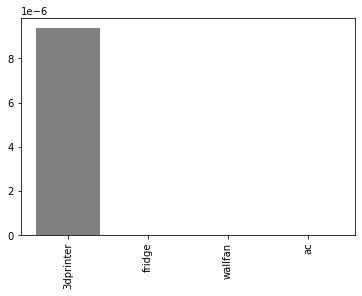

In [711]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=25)

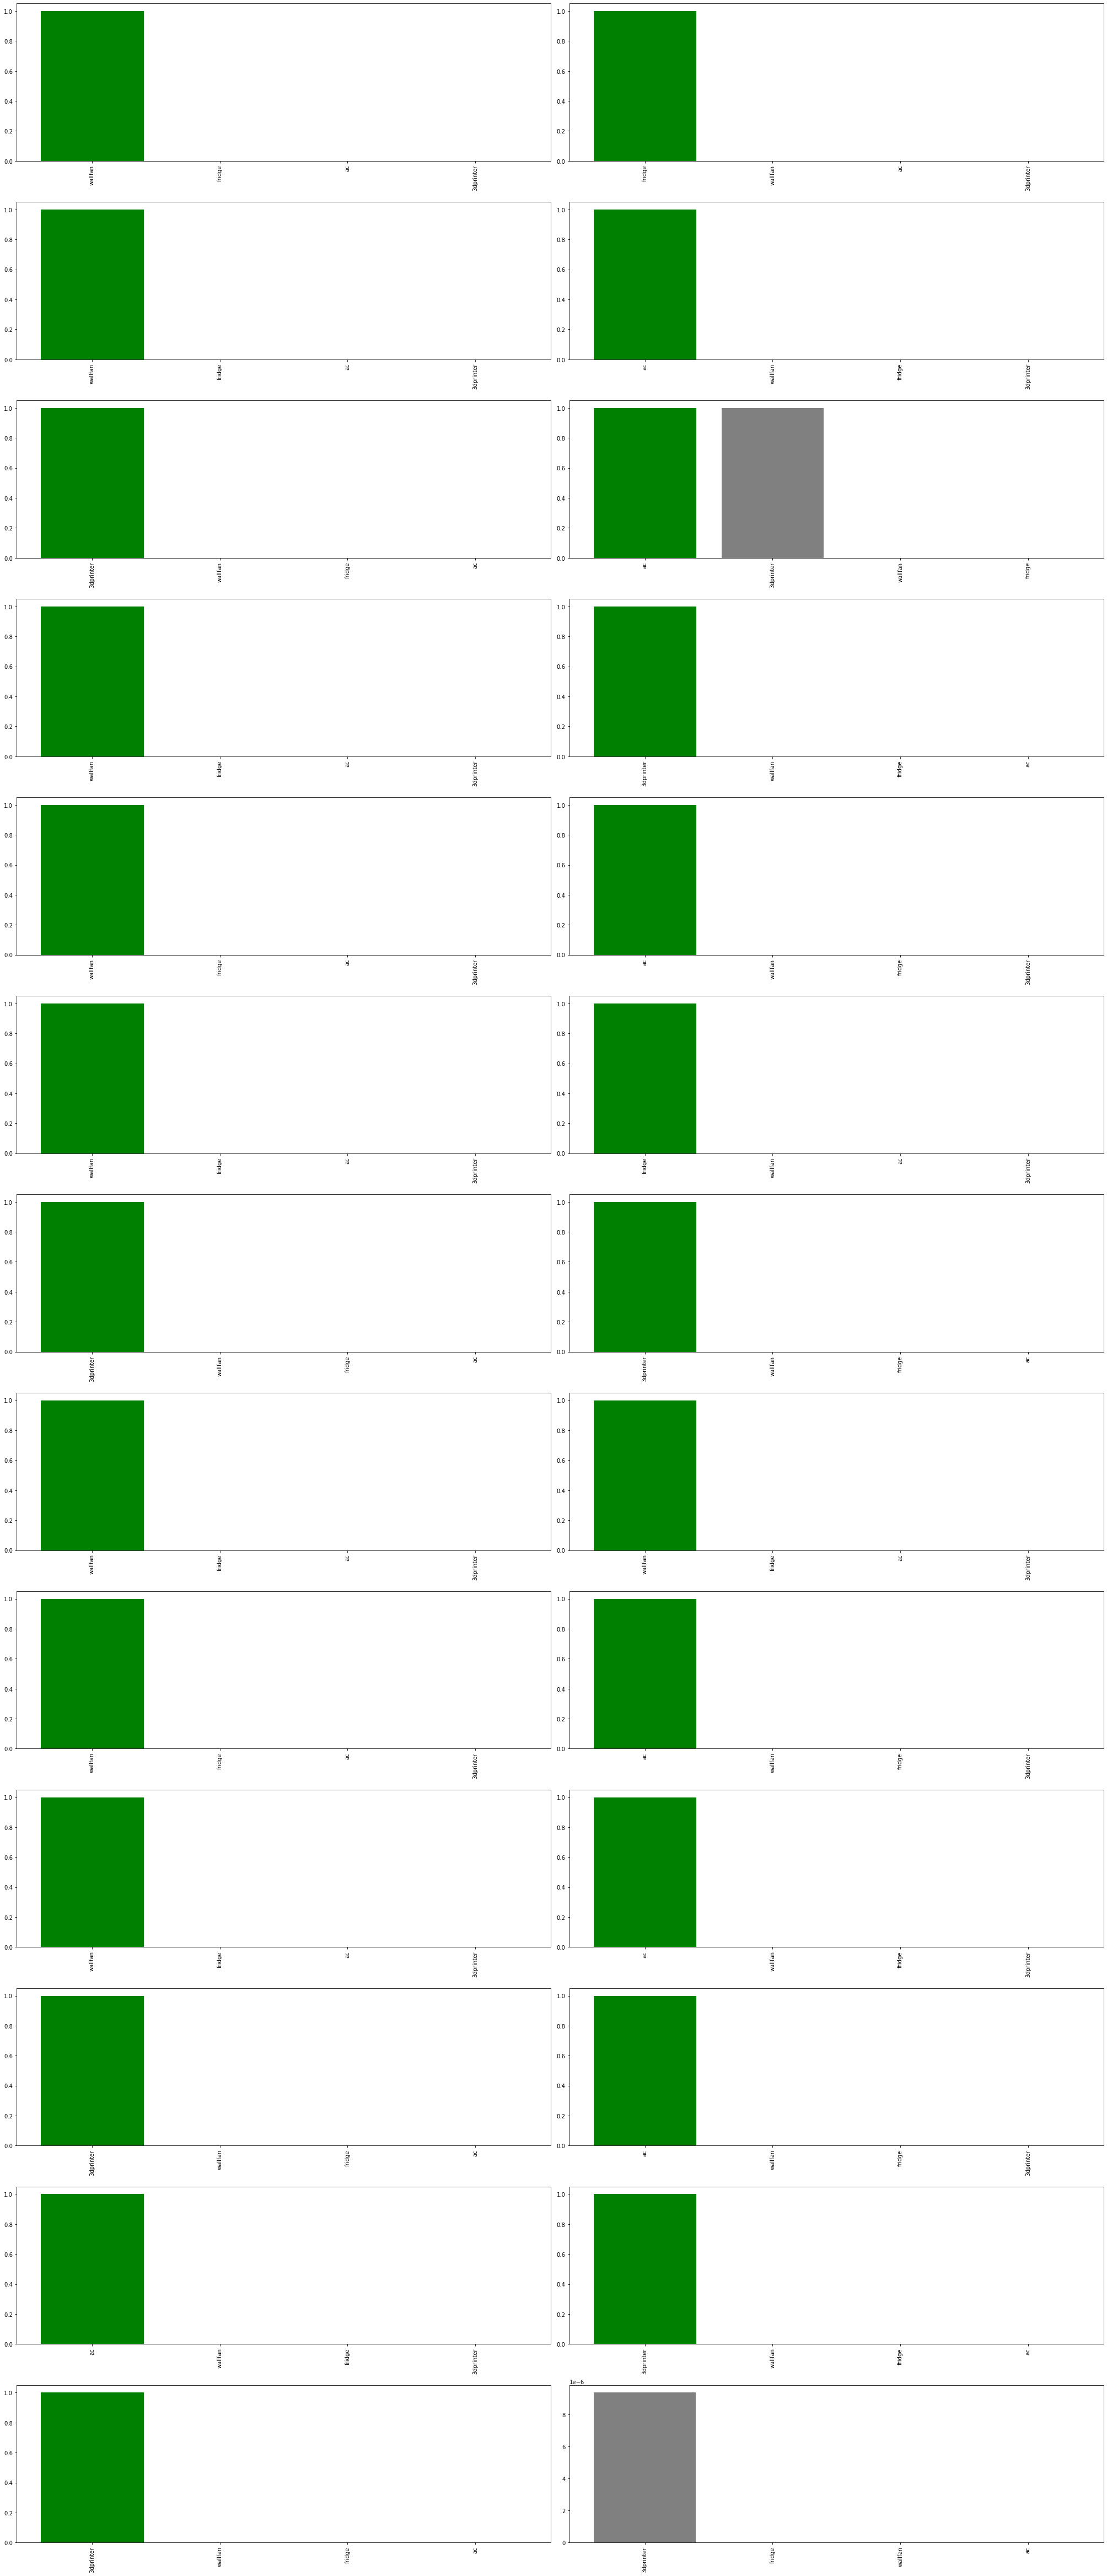

In [721]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 13
num_cols = 2
num_files = num_rows*num_cols
plt.figure(figsize=(7*2*num_cols, 5*num_rows))
for i in range(num_files):
    plt.subplot(num_rows, num_cols, i+1)
    plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [713]:
import os
import datetime

In [714]:
def save_model(model, suffix=None):
    """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
    """
  # Create model directory with current time
    modeldir = os.path.join(".\models",
                          datetime.datetime.now().strftime("%m-%d-%Y"))
    model_path = modeldir + "-" + suffix + ".h5" # save format of model
    print(f"Saving model to: {model_path}...")
    model.save(model_path)
    return model_path

In [715]:
# Save our model trained on 400 signatures
save_model(model, suffix="400 files-Adam")

Saving model to: .\models\09-15-2020-400 files-Adam.h5...


'.\\models\\09-15-2020-400 files-Adam.h5'

In [716]:
def load_model(model_path):
    """
  Loads a saved model from a specified path.
    """
    print(f"Loading saved model from: {model_path}")
    model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
    return model

In [717]:
# Load our model trained 
model = load_model('./models/09-15-2020-400 files-Adam.h5')

Loading saved model from: ./models/09-15-2020-400 files-Adam.h5


In [718]:
# Evaluate the pre-saved model
model.evaluate(val_data)

3/3 [==============================] - 0s 6ms/step - loss: 3.3776


3.377636194229126